In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load CSV

In [2]:
gc_members = pd.read_csv('../data/NSS_GreatCare_Members.csv', low_memory=False)
ip_admin = pd.read_csv('../data/NSS_Hospital_Inpatient_Admissions.csv', low_memory=False)
pc_visits = pd.read_csv('../data/NSS_PrimaryCare_Office_Visits.csv', low_memory=False)

## Convert Date Time

In [3]:
ip_admin['Encounter Start Date'] = pd.to_datetime(ip_admin['Encounter Start Date'], format='%Y-%m-%d')
ip_admin['Encounter End Date'] = pd.to_datetime(ip_admin['Encounter End Date'], format='%Y-%m-%d')
pc_visits['Encounter Date'] = pd.to_datetime(pc_visits['Encounter Date'], format='%Y-%m-%d')

In [4]:
ip_admin['Patient ID'].nunique()

4701

In [5]:
gc_members['Patient ID'].nunique()

61519

## Question 1:

In [6]:
ip_admin = ip_admin.sort_values(['Patient ID','Encounter Start Date', 'Encounter End Date'], ascending = (False, True, True))

In [7]:
# ip_admin['time_lapse'] = ip_admin['Encounter End Date'] - ip_admin['Encounter Start Date']

In [8]:
# ip_admin1['diff'] = ip_admin1.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff'] = ip_admin1['diff'].fillna(0)
# ip_admin1['diff_end'] = ip_admin1.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff_end'] = ip_admin1['diff_end'].fillna(0)
# ip_admin1

## Create "Previous End Date" column 
Calculate number of days

In [9]:
ip_admin['Previous End Date'] = (ip_admin.groupby('Patient ID')['Encounter End Date'].shift(1))
ip_admin['Days Since Last Visit'] = ip_admin['Encounter Start Date'] - ip_admin['Previous End Date']

admin_ct = len(ip_admin)
admin_ct


6213

In [10]:
ip_admin['Patient ID'].count()

6213

#### Filter For Readmission

In [11]:
first = ip_admin
first = first[first['Days Since Last Visit'].notnull()]
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']
# ip_admin_under_30 = first[first['Days Since Last Visit'] < '30 days']
ip_between = first[first['Days Since Last Visit'].between('0 days', '30 days', inclusive=True)]
ip_between.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,2015-11-23,1 days
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1942320288,1.942320e+09,1184722779,2013-10-25,2013-10-28,1,0,1.0,1,6,21.0,NaN,NaN,K91.89,Other postprocedural complications and disorde...,0,12277.13,0.0,2013-10-16,9 days
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1972545085,1.972545e+09,1902803315,2011-01-25,2011-01-26,0,0,2.0,4,62,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,13596.10,250.0,2011-01-24,1 days
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.0,2011-01-26,0 days
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,DS1|9809,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1821297797,1.821298e+09,1689608150,2013-01-20,2013-01-24,0,0,2.0,1,1,21.0,NaN,NaN,I48.0,Paroxysmal atrial fibrillation,0,10721.07,250.0,2013-01-11,9 days


#### Subsetting Data in case we want to use less columns

In [12]:
ip_between1 = ip_between
ip_between1 = ip_between[['Patient ID', 'Encounter Start Date', 'Encounter End Date', 'Previous End Date', 'Days Since Last Visit']]
# ip_between1.head()

##### Count of Unique Patient IDs

In [13]:
#numerator
# ip_between['Patient ID'].nunique()

In [14]:
#denomenator
# ip_admin['Patient ID'].nunique()

In [15]:
#count of unique patient ids
# (ip_between['Patient ID'].nunique() / ip_admin['Patient ID'].nunique()) * 100

##### Readmissions between 0 and 30 days. Use this

In [16]:
#numerator
ip_between['Patient ID'].count()

703

In [17]:
#denomenator
ip_admin['Patient ID'].count()

6213

In [18]:
#count of days between 0 and 30
round((ip_between['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

11.315

11.315%

Brenda's Code

In [19]:
# #make df(patient, start date, end date)
# one = adm[['Patient ID','Encounter Start Date','Encounter End Date']]
# #set datetime
# one['Encounter Start Date'] = pd.to_datetime(one['Encounter Start Date'], format='%Y-%m-%d')
# one['Encounter End Date'] = pd.to_datetime(one['Encounter End Date'], format='%Y-%m-%d')
# #order by patient then start date
# one = one.sort_values(['Patient ID',"Encounter Start Date", "Encounter End Date"], ascending = (False, True, True))
# #if difference between Encounter End Date and Encounter Start Date < 30
# one['diff'] = one.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# one['diff'] = one['diff'].fillna(0)
# one['diff_end'] = one.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# one['diff_end'] = one['diff_end'].fillna(0)
# one

### Bucket By Month<br>
For graphing purposes

In [20]:
ip_admin2 = ip_between
ip_admin2['year'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).year
ip_admin2['month'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).month

ip_admin2.head()

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit,year,month
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,2015-11-23,1 days,2015,11
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1942320288,1.942320e+09,1184722779,2013-10-25,2013-10-28,1,0,1.0,1,6,21.0,NaN,NaN,K91.89,Other postprocedural complications and disorde...,0,12277.13,0.0,2013-10-16,9 days,2013,10
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1972545085,1.972545e+09,1902803315,2011-01-25,2011-01-26,0,0,2.0,4,62,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,13596.10,250.0,2011-01-24,1 days,2011,1
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.0,2011-01-26,0 days,2011,1
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,DS1|9809,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1821297797,1.821298e+09,1689608150,2013-01-20,2013-01-24,0,0,2.0,1,1,21.0,NaN,NaN,I48.0,Paroxysmal atrial fibrillation,0,10721.07,250.0,2013-01-11,9 days,2013,1


##### filter for number of readmissions per patient

In [21]:
read_count_patient = ip_admin2.groupby(['Patient ID'], as_index=False).count()
read_count_patient = read_count_patient.sort_values(['Patient ID'], ascending = (False))
read_count_patient_high = read_count_patient[read_count_patient['Encounter ID'] >= 0]
# read_count_patient_high

##### filter for number of readmissions per Hospital

In [22]:
read_count_hospital = ip_admin2.groupby(['Facility Provider NPI'], as_index=False).count()
read_count_hospital = read_count_hospital.sort_values(['Patient ID'], ascending = (False))
read_count_hospital_high = read_count_hospital[read_count_hospital['Encounter ID'] >= 5]

##### filter for number of readmissions per Attendant 

In [23]:
read_count_attendant = ip_admin2.groupby(['Attending Provider NPI'], as_index=False).count()
read_count_attendant = read_count_attendant.sort_values(['Patient ID'], ascending = (False))
read_count_attendant_high = read_count_attendant[read_count_attendant['Encounter ID'] >= 5]

### Visual

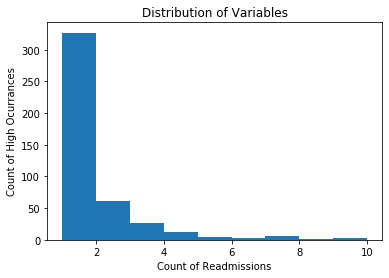

In [24]:
#filter for number of readmissions per patient
occurance1 = read_count_patient_high
bin1 = 9
#filter for number of readmissions per Hospital
occurance2 = read_count_hospital_high
bin2 = 7
#filter for number of readmissions per Attendant 
occurance3 = read_count_attendant_high
bin3 = 7

_= plt.hist('Encounter ID', bins = bin1, data = occurance1)
_= plt.title('Distribution of Variables')
_= plt.ylabel('Count of High Ocurrances')
_= plt.xlabel('Count of Readmissions')

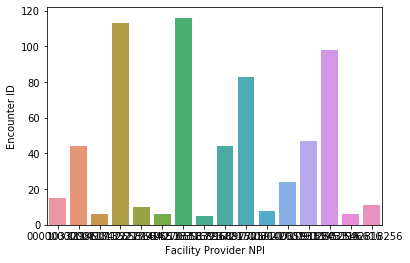

In [25]:
# sns.set_theme(style="whitegrid")
# ax = figsize

ax = sns.barplot(x='Facility Provider NPI', y='Encounter ID',  data=occurance2)

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


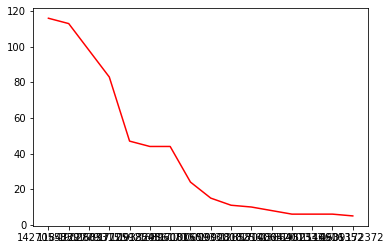

In [26]:
#filter for number of readmissions per patient
measure1 = read_count_patient_high['Patient ID']
value1 = read_count_patient_high['Encounter ID']
#filter for number of readmissions per Hospital
measure2 = read_count_hospital_high['Facility Provider NPI']
value2 =  read_count_hospital_high['Encounter ID']
#filter for number of readmissions per Attendant 
read_count_attendant_high['Attending Provider NPI']= read_count_attendant_high['Attending Provider NPI'].astype(str)
measure3 = read_count_attendant_high['Attending Provider NPI']
value3 = read_count_attendant_high['Encounter ID']

#ax = plt.gca()
rc={'figure.figsize':(20,15)}
_=plt.plot(measure2, value2, color = 'red')

# Question 2

In [27]:
### make df and merge
ad_short = ip_admin[['Patient ID','Encounter End Date']]
pcp_short = pc_visits[['Patient ID','Encounter Date']]
two = pd.merge(ad_short, pcp_short, how='left', on='Patient ID')
# two = ad_cut.merge(pcp_cut, left_on ='Patient ID', right_on = 'Patient ID',how='left', indicator = False)
###sort
two = two.sort_values(['Patient ID',"Encounter Date", "Encounter End Date"], ascending = (False, True, True))
###sub encounter date from end dates
two['Days Since Last Visit'] = two['Encounter Date'] - two['Encounter End Date']
two_between = two[two['Days Since Last Visit'].between('0 days', '7 days', inclusive=True)]
# two_top = two[two['Days Since Last Visit'] <= '7 days']
# two_top = two_top[two_top['Days Since Last Visit'] >= '0 days']
# two_top
len(two_between)

2375

#### Drop Duplicates From PCP

In [28]:
two_between_dups = two_between.sort_values(['Patient ID'], ascending = (False)).drop_duplicates(
                    ['Patient ID','Encounter End Date'])

In [29]:
len(two_between_dups)

1863

#### By Admission

In [30]:
#numerator
two_between_dups['Patient ID'].count()

1863

In [31]:
#denomenator
two['Patient ID'].count()

44098

In [32]:
round((two_between_dups['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

29.986

29.986%

# Question 3

##### For 30 Day Readmissions

_By Individual Doctor_

_By The Provider Group_

In [33]:
# ip_between.info()

##### 7 Day

_By Individual Doctor_

_By The Provider Group_

In [34]:
# two_between_dups.info()

#### Bucket By Month 

For graphing purposes

## Readmitted in the Same Day 

In [35]:
first_0 = first[first['Days Since Last Visit'] == '0 days']
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']

In [36]:
len(first_0)

127

In [37]:
first_0

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.00,2011-01-26,0 days
6177,HIA|DS1|9770|DS1|NPI|1427055839|1,DS1|9770,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1073831061,1.073831e+09,1427055839,2014-03-22,2014-03-25,0,0,2.0,4,1,21.0,410.71,"Subendocardial infarction, initial episode of ...",NaN,NaN,0,34784.32,250.00,2014-03-22,0 days
6130,HIA|DS1|9391|DS1|NPI|1114901352|1,DS1|9391,DS1|1,DS1|5047W,DS1|NPI|1114901352,DS1|NPI|1326006941,1.326007e+09,1114901352,2015-02-17,2015-03-01,0,0,3.0,4,1,21.0,NaN,NaN,R26.9,Unspecified abnormalities of gait and mobility,0,43935.04,250.00,2015-02-17,0 days
5980,HIA|DS1|7733|DS1|NPI|1033298617|1,DS1|7733,DS1|1,DS1|5047W,DS1|NPI|1033298617,DS1|NPI|1437485968,1.437486e+09,1033298617,2013-03-29,2013-04-01,0,0,2.0,4,1,NaN,NaN,NaN,I50.33,Acute on chronic diastolic (congestive) heart ...,0,0.00,0.00,2013-03-29,0 days
5800,HIA|DS1|6142|DS1|NPI|1184722779|1,DS1|6142,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1861657744,1.861658e+09,1184722779,2012-03-24,2012-03-26,0,0,2.0,4,1,21.0,NaN,NaN,J45.901,Unspecified asthma with (acute) exacerbation,0,7656.00,250.00,2012-03-24,0 days
5633,HIA|DS1|59975|DS1|NPI|1033298617|1,DS1|59975,DS1|1,DS1|5047W,DS1|NPI|1033298617,DS1|NPI|1437485968,1.437486e+09,1033298617,2015-07-16,2015-07-22,0,0,2.0,4,1,21.0,NaN,NaN,N17.0,Acute kidney failure with tubular necrosis,0,0.00,0.00,2015-07-16,0 days
5395,HIA|DS1|57937|DS1|NPI|1902803315|1,DS1|57937,DS1|1,DS1|5047W,DS1|NPI|1902803315,DS1|NPI|1699033860,1.699034e+09,1902803315,2014-06-21,2014-06-26,0,0,2.0,6,1,23.0,NaN,NaN,H05.019,Cellulitis of unspecified orbit,0,38997.04,0.00,2014-06-21,0 days
5364,HIA|DS1|57711|DS1|NPI|1427055839|1,DS1|57711,DS1|1,DS1|5047W,DS1|NPI|1427055839,NaN,NaN,1427055839,2012-08-06,2012-08-19,0,0,2.0,4,1,NaN,NaN,NaN,P07.17,"Other low birth weight newborn, 1750-1999 grams",0,76643.00,250.00,2012-08-06,0 days
4971,HIA|DS1|53921|DS1|NPI|1902803315|1,DS1|53921,DS1|1,DS1|5047W,DS1|NPI|1902803315,DS1|NPI|1982643318,1.982643e+09,1902803315,2014-11-09,2014-11-14,0,0,2.0,4,3,21.0,250.70,Diabetes with peripheral circulatory disorders...,NaN,NaN,0,45203.84,0.00,2014-11-09,0 days
4969,HIA|DS1|53921|DS1|NPI|1427055839|3,DS1|53921,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1720377880,1.720378e+09,1427055839,2015-04-11,2015-05-06,0,0,2.0,4,30,21.0,NaN,NaN,I70.26,Atherosclerosis of native arteries of extremit...,0,46179.06,250.00,2015-04-11,0 days


#### By Hospital

In [38]:
read0_count_hosp = first_0.groupby(['Facility Provider NPI'], as_index=False).count()
read0_count_hosp = read0_count_hosp.sort_values(['Patient ID'], ascending = (False))
# read0_count_hosp_high = read_count_hospital[read_count_hospital['Encounter ID'] >= 5]

In [39]:
read0_count_hosp.head(3)

,Facility Provider NPI,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit
25,1902803315,21,21,21,21,21,20,20,21,21,21,21,21,21,21,21,4,4,17,16,21,21,21,21,21
14,1427055839,17,17,17,17,17,16,16,17,17,17,17,17,17,17,14,6,6,11,11,17,17,17,17,17
7,1184722779,16,16,16,16,16,16,16,16,16,16,16,15,16,16,16,3,3,13,13,16,16,16,16,16


#### Hospitals with Multiple Same Day Readmissions Count
1) 1902803315 - 21<br>
2) 1427055839 -17<br>
3) 1184722779 - 16

In [40]:
UCSF = read0_count_hosp[read0_count_hosp['Facility Provider NPI'] == '1689772592']
UCSF

,Facility Provider NPI,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit
19,1689772592,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1


#### Determining Rate

In [41]:
#Renaming Thirty Day
thirty_by_hospital = read_count_hospital[['Facility Provider NPI', 'Patient ID']]
thirty_by_hospital.rename(columns = {'Facility Provider NPI' : 'Hospital', 'Patient ID' : 'Readmissions Within 30'}, inplace = True)

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#Renaming Zero Days
zero_day = read0_count_hosp[['Facility Provider NPI', 'Patient ID']]
zero_day.rename(columns = {'Facility Provider NPI' : 'Hospital', 'Patient ID' : 'Same Day Readmissions'}, inplace = True)

In [43]:
zero_thirty = pd.merge(zero_day, thirty_by_hospital, how="inner", on="Hospital")
zero_thirty['Rate'] = zero_thirty['Same Day Readmissions'] / zero_thirty['Readmissions Within 30'] *100
zero_thirty = zero_thirty[zero_thirty['Readmissions Within 30'] >= 20]
zero_thirty = zero_thirty.sort_values(['Rate'], ascending=False)
zero_thirty

,Hospital,Same Day Readmissions,Readmissions Within 30,Rate
0,1902803315,21,98,21.428571
5,1710918545,7,47,14.893617
1,1427055839,17,116,14.655172
2,1184722779,16,113,14.159292
6,1689608150,6,44,13.636364
15,1033298617,2,44,4.545455
22,1710065933,1,24,4.166667
21,1689772592,1,83,1.204819


## Healthcare Plan for Frequent Fliers

In [44]:
in_mem = pd.merge(ip_admin, gc_members, how='left', on='Patient ID')

In [45]:
in_mem_short = in_mem[['Patient ID', 'Encounter Start Date', 'Encounter End Date', 'Previous End Date', 'Days Since Last Visit', 'Patient Age Integer','Primary Plan Description']]

In [46]:
in_mem_short

,Patient ID,Encounter Start Date,Encounter End Date,Previous End Date,Days Since Last Visit,Patient Age Integer,Primary Plan Description
0,DS1|9996,2010-03-28,2010-03-31,NaT,NaT,26,GreatCare Silver
1,DS1|9994,2015-11-21,2015-11-23,NaT,NaT,37,GreatCare Gold
2,DS1|9994,2015-11-24,2015-11-27,2015-11-23,1 days,37,GreatCare Gold
3,DS1|9981,2014-08-07,2014-08-10,NaT,NaT,33,GreatCare Gold
4,DS1|9979,2015-02-06,2015-02-11,NaT,NaT,39,GreatCare Silver
5,DS1|9978,2015-09-01,2015-09-05,NaT,NaT,46,GreatCare Silver
6,DS1|9965,2014-02-16,2014-02-19,NaT,NaT,13,GreatCare Gold
7,DS1|9953,2012-03-20,2012-03-20,NaT,NaT,22,GreatCare Gold
8,DS1|9945,2013-02-09,2013-02-11,NaT,NaT,34,GreatCare Gold
9,DS1|9943,2013-10-01,2013-10-16,NaT,NaT,64,GreatCare Silver


In [47]:
ims = in_mem_short
ims = ims[ims['Days Since Last Visit'].notnull()]
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']
# ip_admin_under_30 = first[first['Days Since Last Visit'] < '30 days']
ims_between = ims[ims['Days Since Last Visit'].between('0 days', '30 days', inclusive=True)]
ims_between.head()

,Patient ID,Encounter Start Date,Encounter End Date,Previous End Date,Days Since Last Visit,Patient Age Integer,Primary Plan Description
2,DS1|9994,2015-11-24,2015-11-27,2015-11-23,1 days,37,GreatCare Gold
10,DS1|9943,2013-10-25,2013-10-28,2013-10-16,9 days,64,GreatCare Silver
14,DS1|9935,2011-01-25,2011-01-26,2011-01-24,1 days,51,GreatCare Silver
15,DS1|9935,2011-01-26,2011-02-07,2011-01-26,0 days,51,GreatCare Silver
28,DS1|9809,2013-01-20,2013-01-24,2013-01-11,9 days,56,GreatCare Gold


In [48]:
len(ims_between)

703

In [49]:
ims_between['Primary Plan Description'].value_counts()

GreatCare Gold        379
GreatCare Silver      275
GreatCare MA           43
GreatCare Bronze        3
GreatCare Medicaid      3
Name: Primary Plan Description, dtype: int64